In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Laser.laser.abcd import Beampath, GaussianBeampath
import warnings
%matplotlib inline

In [2]:
def focus_shift_from_zernike(defocus, astig0=None, radBeam=0.04, radDef=None, f=2.034, D=0):
    """
    Calculates focus shift and divergence from defocus and astigmatism 0 degree

    Parameters
    ----------
    defocus: float
        zernike coefficient of defocus, in microns

    astig0: float, optional
        zernike coefficient of astigmatism 0 degree, in microns

    radBeam: float, optional
        beam radius, in metre

    radDef: float, optional
        default radius, to compare measurements with different measured radii, in metre

    f: float, optional
        focal length, in metre

    D: float, optional
        distance from measurement to focusing optic, in metre
    """
    if astig0 is None:
        astig0 = np.zeros_like(defocus)
    if radDef is None:
        radDef = radBeam

    cx = 4 * np.sqrt(3) * (defocus + astig0 / np.sqrt(2)) * 1e-6
    cy = 4 * np.sqrt(3) * (defocus - astig0 / np.sqrt(2)) * 1e-6
    cr = 4 * np.sqrt(3) * defocus * 1e-6

    divergence_x = np.arctan(cx / radBeam**2 * radDef)
    divergence_y = np.arctan(cy / radBeam**2 * radDef)
    divergence_avg = np.arctan(cr / radBeam**2 * radDef)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        foc_shift_x = f**2 / (radBeam / divergence_x + D - f)
        foc_shift_y = f**2 / (radBeam / divergence_y + D - f)
        foc_shift_avg = f**2 / (radBeam / divergence_avg + D - f)

    return foc_shift_avg, foc_shift_x, foc_shift_y, divergence_avg, divergence_x, divergence_y


def focus_shift_from_angle(angle, radBeam=0.04, f=2.034, D=0):
    """
    Calculates focus shift and divergence from divergence angle out of OAP

    Parameters
    ----------
    angle: float, optional
            Half divergence angle in radians

    radBeam: float, optional
        beam radius, in metre

    f: float, optional
        focal length, in metre

    D: float, optional
        distance from measurement to focusing optic, in metre
    """

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        foc_shift_x = f**2 / (radBeam / angle + D - f)

    return foc_shift_x


def defocus_from_angle(angle, radBeam=0.04):
    """
    Calculates defocus from divergence out of OAP

    Parameters
    ----------
    angle: float, optional
            Half divergence angle in radians

    radBeam: float, optional
        beam radius, in metre
    """

    defoc = radBeam*np.tan(angle)/(4 * np.sqrt(3) * 1e-6)

    return defoc #mum

Measured conversion: 0.04082840236686391 nm/mum
Simulated conversion: 0.05582098129145973 nm/mum


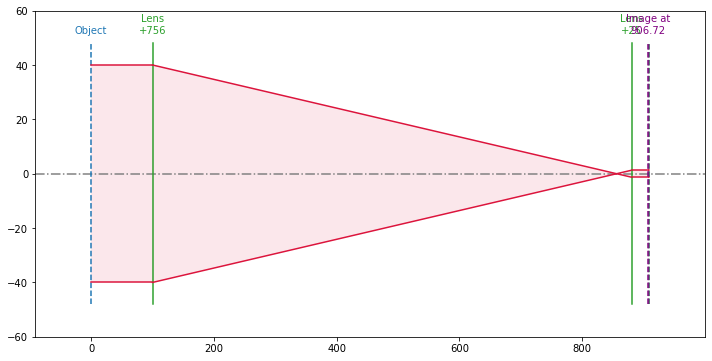

In [167]:
# Measurement or simulations (?) has shown that 6.9 nm defocus -> 169 micron focus shift
print(f'Measured conversion: {6.9/169} nm/mum')

# The conversion using an ideal wfs setup and the functions above is calculated below:

# Initialise input
bp = Beampath(40, np.deg2rad(0.000))

# Add elements
bp.add_freespace(100)

# lens 1
bp.add_thinlens(756)
bp.add_freespace(781)
#lens 2
bp.add_thinlens(25)
bp.add_freespace(28)

bp.add_image()
# Display the beam path
bp.plot()

# transforming angle at wfs to corresponding angle at OAP
angle = bp.angle[-1]*(bp.radius[-1])/40 #mm/mm

zfoc = focus_shift_from_angle(angle)*1e6 #mum
dfoc = defocus_from_angle(angle)*1e3 #nm

print(f'Simulated conversion: {dfoc/(zfoc)} nm/mum')

The simulated and measured conversion between defocus and focus position is differing by ~0.015nm/mum. Either I am doing something wrong in the functions or the system is too simplified. Where does the  6.9/169 nm/mum come from? 

Simulated conversion: 55820.98127399118 nm/mum
Focus position: 0.0006365180280523986 mum
Focus position calculated by measured conversion: 0.0008702535211935584 mum


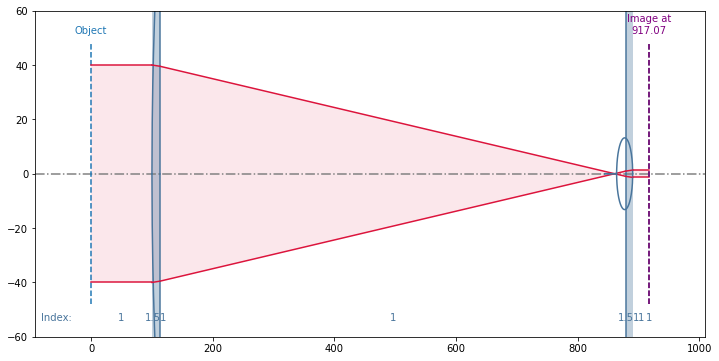

In [168]:
# non-ideal system - design wl: 800
n = 1.5108

# Initialise input
bp = Beampath(40, np.deg2rad(0.000))

# Add elements
bp.add_freespace(100)

# lens 1
bp.add_interface(n, 386.3)
bp.add_freespace(13)
bp.add_interface(1)

bp.add_freespace(765.7575455)

#lens 2
bp.add_interface(n, np.inf)
bp.add_freespace(11.7)
bp.add_interface(1, -13.2)

bp.add_freespace(27)

# Calculate image position 
bp.add_image()

# Display the beam path
bp.plot()

angle = bp.angle[-1]*(bp.radius[-1])/40 #mm/mm

zfoc = focus_shift_from_angle(angle,D=0)


# transforming angle at wfs to corresponding angle at OAP
angle = bp.angle[-1]*(-bp.radius[-1])/40 #mm/mm

zfoc = focus_shift_from_angle(angle) #m
dfoc = defocus_from_angle(angle)*1e3 #nm

print(f'Simulated conversion: {dfoc/(zfoc)} nm/mum')
print(f'Focus position: {zfoc*1e6} mum')
print(f'Focus position calculated by measured conversion: {dfoc/0.04082840236686391} mum')


Focus position: 6188.028629838211 mum
Focus position calculated by measured conversion: 8434.671037521804 mum


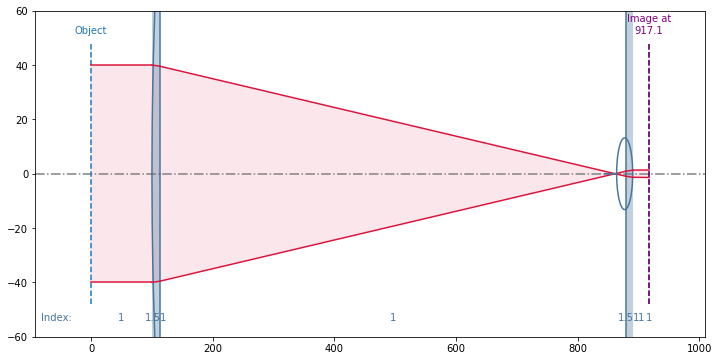

In [180]:
# wl: 828
n = 1.51023896

# Initialise input
bp = Beampath(40, np.deg2rad(0.000))

# Add elements
bp.add_freespace(100)

# lens 1
bp.add_interface(n, 386.3)
bp.add_freespace(13)
bp.add_interface(1)

bp.add_freespace(765.7575455)

#lens 2
bp.add_interface(n, np.inf)
bp.add_freespace(11.7)
bp.add_interface(1, -13.2)

bp.add_freespace(27)

# Calculate image position 
bp.add_image()

# Display the beam path
bp.plot()

angle = bp.angle[-1]*(bp.radius[-1])/40 #mm/mm
zfoc1 = focus_shift_from_angle(angle,D=0) #mm

dfoc = defocus_from_angle(angle)*1e3 #nm

zfoc_exp1 = dfoc/0.04082840236686391

print(f'Focus position: {zfoc1*1e6} mum')
print(f'Focus position calculated by measured conversion: {zfoc_exp1} mum')


Focus position: -3296.3296428583303 mum
Focus position calculated by measured conversion: -4514.088939521458 mum


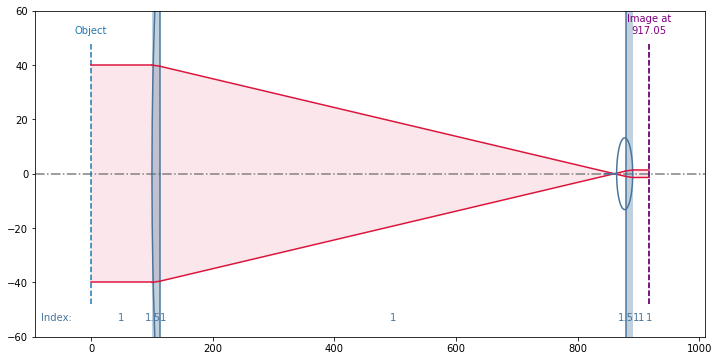

In [181]:
# wl: 784
n = 1.511100206

# Initialise input
bp = Beampath(40, np.deg2rad(0.000))

# Add elements
bp.add_freespace(100)

# lens 1
bp.add_interface(n, 386.3)
bp.add_freespace(13)
bp.add_interface(1)

bp.add_freespace(765.7575455)

#lens 2
bp.add_interface(n, np.inf)
bp.add_freespace(11.7)
bp.add_interface(1, -13.2)

bp.add_freespace(27)

# Calculate image position 
bp.add_image()

# Display the beam path
bp.plot()

angle = bp.angle[-1]*(bp.radius[-1])/40 #mm/mm
zfoc_sim2 = focus_shift_from_angle(angle,D=0)*1e6 #mum
dfoc = defocus_from_angle(angle)*1e3 #nm
zfoc_exp2 = dfoc/0.04082840236686391 #nm/(nm/mum)

print(f'Focus position: {zfoc2*1e6} mum')
print(f'Focus position calculated by measured conversion: {zfoc_exp2} mum')


In [182]:
l1 = 828
l2 = 784
l = l1-l2

k = (zfoc1-zfoc2)*1e6/l
print(f'The chromaticity of the mesurement error of focus position is {k:0.5} mum/nm')

k = (zfoc_exp1-zfoc_exp2)/l
print(f'The chromaticity of the mesurement error of focus position is when using the experimental conversion {k:0.5} mum/nm')

The chromaticity of the mesurement error of focus position is 215.55 mum/nm
The chromaticity of the mesurement error of focus position is when using the experimental conversion 294.29 mum/nm
